In [1]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import mglearn
import matplotlib.pyplot as plt

# Kernelized Support Vector Machines
- often abbreviated as SVM
- allows more complex models that are not defined by simple hyperplanes in the input space
- classification is performed by SVC, while regression is implemented in SVR

## Linear models and nonlinear features
- linear models can be quite limiting in low-dimensional spaces, as lines and hyperplanes have limited flexibility
- adding more features (ie adding interactions or polynomials of the input features) can make a linear model more flexible


Text(0, 0.5, 'Feature 1')

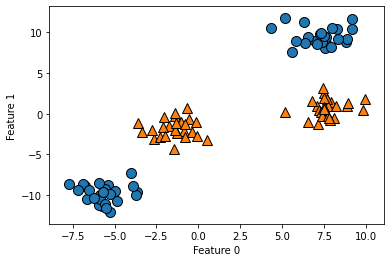

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- using a linear model for classification can only separate points using a line, and will not be able to do a good job on this dataset

/home/friend/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Feature 1')

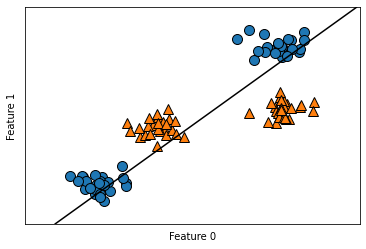

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<ipython-input-4-fda6e860879c>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 **2')

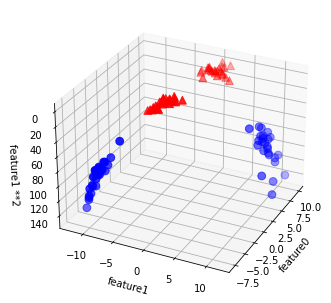

In [4]:
X_new = np.hstack([X, X[:,1:] ** 2])

from mpl_toolkits.mplot3d.axes3d import Axes3D
figure = plt.figure()
#visualize in 3d
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y==1
mask = (y == 0)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
    cmap=mglearn.cm2, s=60
)
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^', 
    cmap=mglearn.cm2, s=60
)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 **2")


/home/friend/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-5-bde8725c46d8>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature0 **2')

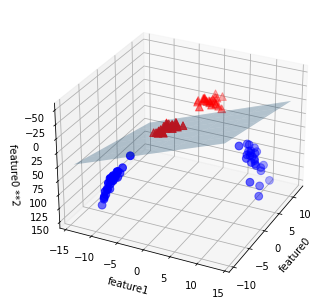

In [5]:

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() -2, X_new[:,0].max() +2, 50)
yy = np.linspace(X_new[:,1].min() -2, X_new[:,1].max() +2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0], X_new[mask, 1], X_new[mask, 2], c= 'b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 **2")



Text(0, 0.5, 'Feature 1')

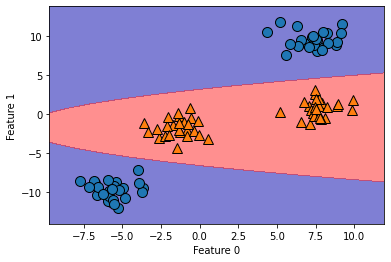

In [7]:
ZZ = YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
    cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## The kernel trick
- as shown, adding nonlinear feature to the representation of data can make linear models more powerful
- problem: we don't know which interaction of features to add (all the possible interactions?! no.)
- rather than guessing at the informative expanded feature representation(s) we can perform the *kernel trick*



Two commonly used support vector machines
1. polynomial kernel
2. radial basis function a/k/a Gaussian kernel (corresponding to an infinite-dimensional feature space)



## Understanding SVMs
- support vectors machines learn how important each of the training data points is to represent the decision boundary. 
- the training points that matter most, being those defining the decision boundary between classes, are the support vectors.
- predictions for a new point, are made by the distance to each of the support vectors is measured.
- The importance of the support vectors is learned during training (stored in the dual_coef_ attribute of SVC)
- distance between data points is measured by the Gaussian kernel: $k_{rbf})x_1, x_2) = \exp(\gamma || x_1 - x_2 || ^2)$
    - $||x_1 - X_2||$ being the Euclidean distance, and $\gamma$ is the parameter that controls the width of the Gaussian kernel


Text(0, 0.5, 'Feature 1')

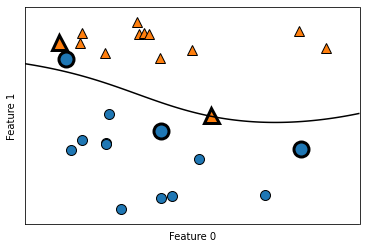

In [8]:

from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
#plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



- SVM yields a very smooth and nonlinear boundary here. * This is not default configuration. We've adjusted the *C* parameter and the *gamma* parameters 



## Tuning SVM parameters
- *gamma* parameter controls the width of the Gaussian kernel and determines the scale of what it means for points to be close together.
- The *C* parameter is the regularization parameter, limiting the importance of each point's *dual_coef_*


In [ ]:

fig, axes = plt.subplots